In [1]:
  !pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.6 MB/s eta 0:00:00


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [17]:
df = pd.read_excel('대구 데이터프레임(4차 수정).xlsx')
df.head()

,행정구역,고령인구 비율,독거노인 비율,고독사 수,병원 수,약국 수,경로당 수,공공체육시설 수,마트 수,음식점 수,버스정류장 수,지하철 역 수,안전지수,공원 수
0,중구,20.631538,23.272501,21.3,467,151,48,2,35,2989,118,10,1.3,17
1,동구,20.652256,23.336192,48.7,494,184,222,23,23,4497,583,13,1.3,91
2,서구,24.086878,24.488659,28.3,269,109,79,13,15,2375,189,4,0.8,28
3,남구,24.196946,25.470990,21.0,258,109,67,6,18,2176,164,9,1.2,24
4,북구,15.444854,21.733819,30.7,591,205,283,38,46,4957,592,14,2.0,130


In [18]:
dfStandard = df.drop(columns='행정구역')
dfStandard.head()

,고령인구 비율,독거노인 비율,고독사 수,병원 수,약국 수,경로당 수,공공체육시설 수,마트 수,음식점 수,버스정류장 수,지하철 역 수,안전지수,공원 수
0,20.631538,23.272501,21.3,467,151,48,2,35,2989,118,10,1.3,17
1,20.652256,23.336192,48.7,494,184,222,23,23,4497,583,13,1.3,91
2,24.086878,24.488659,28.3,269,109,79,13,15,2375,189,4,0.8,28
3,24.196946,25.470990,21.0,258,109,67,6,18,2176,164,9,1.2,24
4,15.444854,21.733819,30.7,591,205,283,38,46,4957,592,14,2.0,130


In [19]:
scaler = StandardScaler()
df_standardized_values = scaler.fit_transform(dfStandard)
df_standardized = pd.DataFrame(df_standardized_values, columns=dfStandard.columns)

In [20]:
df_standardized['행정구역'] = df['행정구역']
print(df_standardized)

    고령인구 비율   독거노인 비율     고독사 수      병원 수      약국 수     경로당 수  공공체육시설 수  \
0  0.466965  0.327734 -0.576606 -0.185920 -0.290513 -1.398634 -1.392024   
1  0.472358  0.361890  1.872851 -0.067806  0.261253  0.269660 -0.180314   
2  1.366385  0.979921  0.049168 -1.052091 -0.992762 -1.101409 -0.757319   
3  1.395036  1.506713 -0.603425 -1.100211 -0.992762 -1.216464 -1.161222   
4 -0.883121 -0.497412  0.263719  0.356530  0.612377  0.854521  0.685193   
5 -0.584632 -1.222581  0.558727  1.502674  0.846460  0.528533  0.338990   
6 -0.860699  0.201577  0.263719  1.520173  1.799512  0.768230  0.742894   
7 -1.372293 -1.657843 -1.828153 -0.973348 -1.243565  1.295564  1.723802   

       마트 수     음식점 수   버스정류장 수   지하철 역 수      안전지수      공원 수 행정구역  
0  0.735093 -0.652242 -1.389848 -0.218218 -0.642999 -1.256847   중구  
1 -0.273035  0.457112  0.776149  0.436436 -0.642999  0.088638   동구  
2 -0.945120 -1.103929 -1.059126 -1.527525 -1.399469 -1.056843   서구  
3 -0.693088 -1.250322 -1.175578 -0.436436 -0.794

In [21]:
df_standardized.to_excel('S - 정규화v2.xlsx', index=False)

In [41]:
dfAverage = pd.read_excel('정규화 평균 지수v2.xlsx')
dfAverage.drop(columns='행정구역', inplace=True)
dfAverage.head()

,수요 지수,인프라 지수,접근성 지수,환경 지수
0,0.072698,-0.530707,-0.804033,-0.949923
1,0.902367,0.077812,0.606292,-0.277180
2,0.798491,-0.992105,-1.293326,-1.228156
3,0.766108,-1.069012,-0.806007,-0.961932
4,-0.372271,0.827223,0.736363,0.606902


**KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

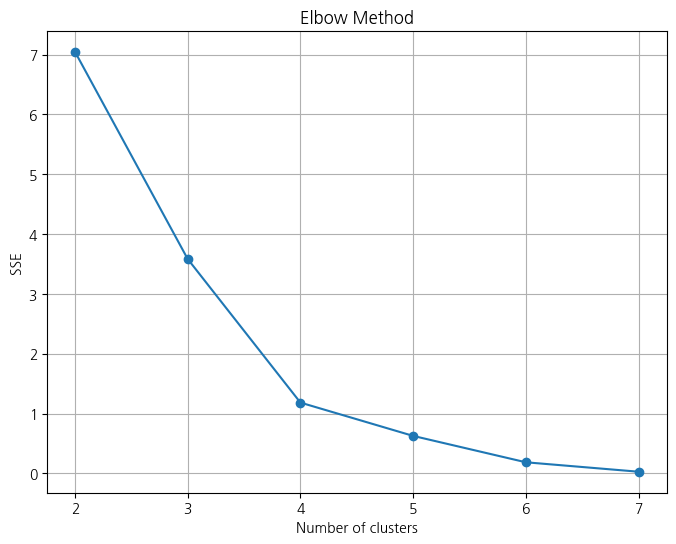

In [23]:
sse = []

K_range = range(2, len(dfAverage))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfAverage)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

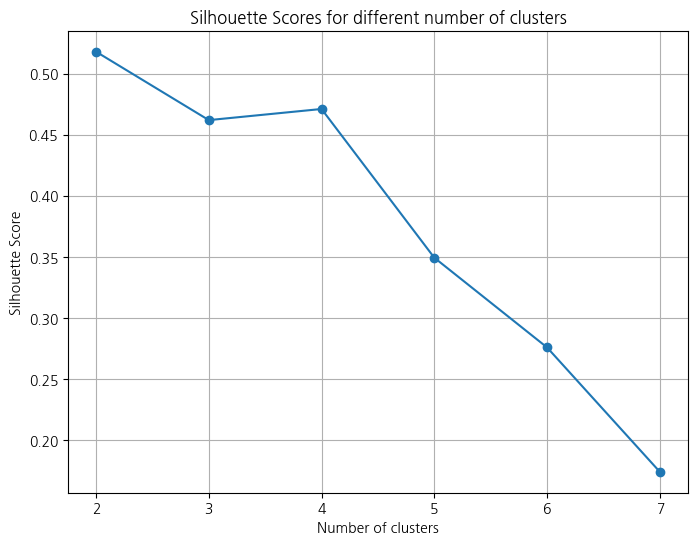

In [24]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# 클러스터 범위 설정
K_range = range(2, 8)  # 2에서 8 클러스터 시도

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dfAverage)
    score = silhouette_score(dfAverage, cluster_labels)
    silhouette_scores.append(score)

# Silhouette Score Plot 생성
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


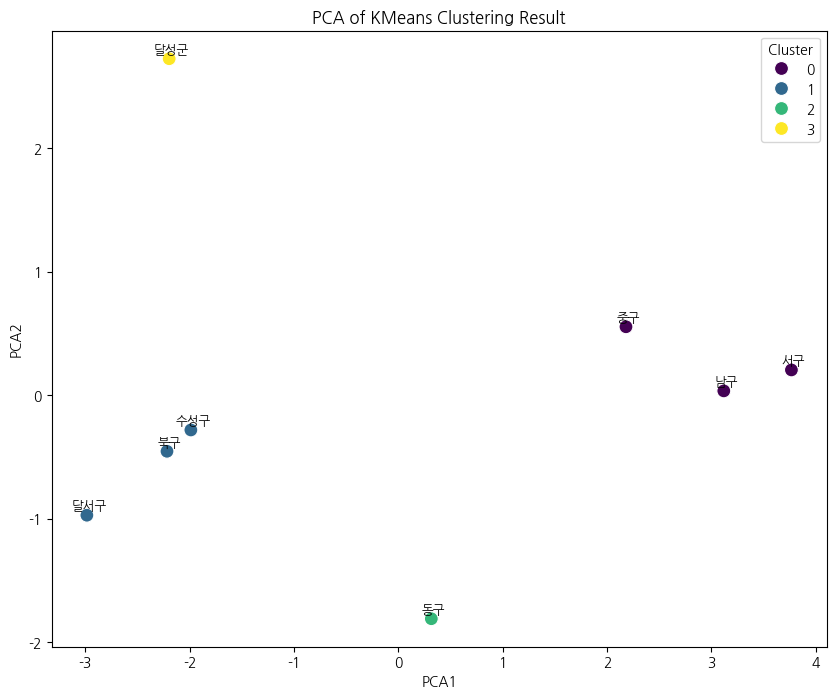

Cluster 0:
[0, 2, 3]
Cluster 1:
[4, 5, 6]
Cluster 2:
[1]
Cluster 3:
[7]


In [46]:
# KMeans 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = pca_result[:, 0]
dfAverage['PCA2'] = pca_result[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=dfAverage, palette='viridis', s=100)
행정구역 = ['중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군']

for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i] + 0.02, txt, fontsize=9, ha='center', va='bottom')

plt.title('PCA of KMeans Clustering Result')
plt.legend(title='Cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())

In [30]:
dfAverage.to_excel('S - KMeans클러스터링 결과.xlsx', index=False)

**DBSCAN**

In [32]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(dfAverage)
dfAverage['cluster'] = db.labels_
print(dfAverage)

      수요 지수    인프라 지수    접근성 지수     환경 지수  cluster
0  0.072698 -0.530707 -0.804033 -0.949923       -1
1  0.902367  0.077812  0.606292 -0.277180       -1
2  0.798491 -0.992105 -1.293326 -1.228156       -1
3  0.766108 -1.069012 -0.806007 -0.961932       -1
4 -0.372271  0.827223  0.736363  0.606902       -1
5 -0.416162  0.605950  0.760560  0.521827       -1
6 -0.131801  1.287525  0.780259  1.079640       -1
7 -1.619429 -0.206687  0.019891  1.208822       -1


**계층적 군집화**

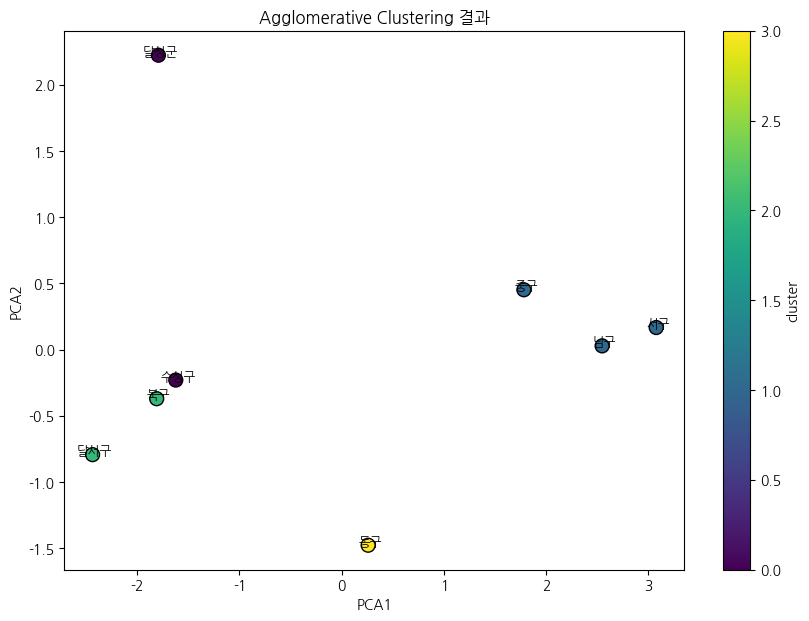

Cluster 0:
[5, 7]
Cluster 1:
[0, 2, 3]
Cluster 2:
[4, 6]
Cluster 3:
[1]


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
clusters = agg.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = principal_components[:, 0]
dfAverage['PCA2'] = principal_components[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 7))
plt.scatter(dfAverage['PCA1'], dfAverage['PCA2'], c=dfAverage['cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i], txt, fontsize=9, ha='center')

plt.title('Agglomerative Clustering 결과')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())

In [34]:
dfAverage.to_excel('S - 계층적 군집화 결과.xlsx', index=False)

**K**-**Medoids**

In [35]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00


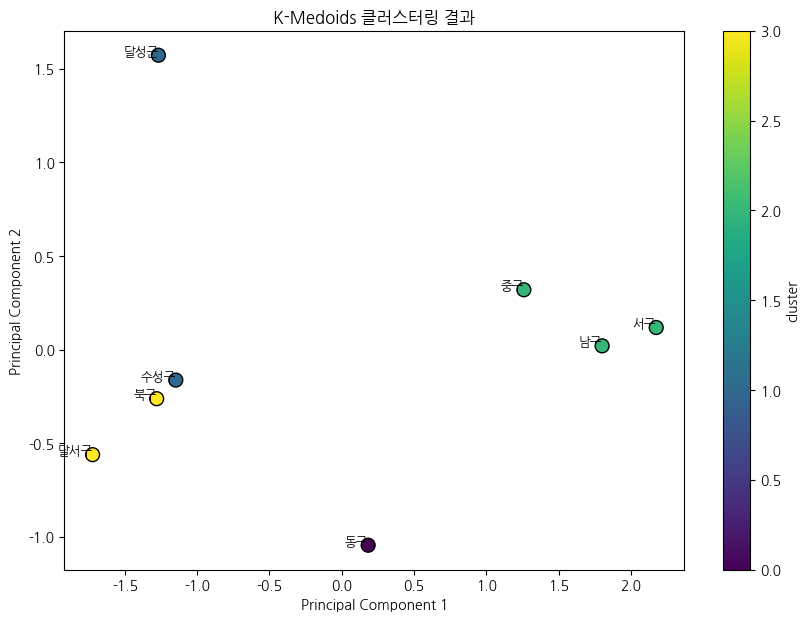

Cluster 0:
[1]
Cluster 1:
[5, 7]
Cluster 2:
[0, 2, 3]
Cluster 3:
[4, 6]


In [43]:
from sklearn_extra.cluster import KMedoids

# KMedoids 클러스터링
kmedoids = KMedoids(n_clusters=4, random_state=42)
clusters = kmedoids.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))

# 2D 시각화
plt.figure(figsize=(10, 7))
sc = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                 c=dfAverage['cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(principal_components[i, 0], principal_components[i, 1], txt, fontsize=9, ha='right')

plt.title('K-Medoids 클러스터링 결과')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(sc, label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())


In [40]:
dfAverage.to_excel('S - K-Medoids클러스터링 결과.xlsx', index=False)